<a href="https://colab.research.google.com/github/Dansah2/Free_Code_Camp_Tutorials/blob/main/Pytorch_EX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.0.0+cu118'

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# create known data

#parameters
weights = 0.3
bias = 0.9

start = 0 
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weights * X * bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.0000],
         [0.0054],
         [0.0108],
         [0.0162],
         [0.0216],
         [0.0270],
         [0.0324],
         [0.0378],
         [0.0432],
         [0.0486]]))

In [ ]:
# check the length

len(X), len(y)

(50, 50)

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  # plot training in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")
  # plot testing data in red
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

  #show legend
  plt.legend(prop={'size': 14})

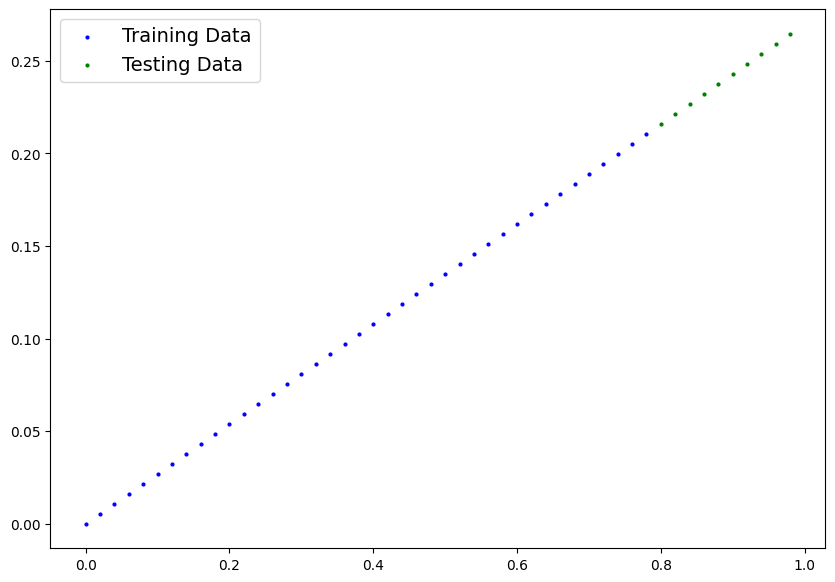

In [ ]:
plot_predictions();

In [ ]:
# create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights= nn.Parameter(torch.randn(1, 
                                           dtype=torch.float),
                               requires_grad=True)
    
    self.bias = nn.Parameter(torch.randn(1, 
                                           dtype=torch.float),
                               requires_grad=True)
    
    
    # forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x * self.bias

In [ ]:
# set manual seed as nn.Parameter are randomly initialized
torch.manual_seed(42)

# create and istance of the regression model
model_0 = LinearRegressionModel()

#check the nn.parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# check what device the model is using
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# set model to GPU if available
model_0.to(device)

#check to see if the model has been moved to the GPU
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Put the data on the cuda device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [ ]:
# list names parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

In [ ]:
# create the loss function
loss_fn = nn.L1Loss()

# create optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
## Train and Test model


EPOCHS = 1000
for epoch in range(EPOCHS):
  # start training
  model_0.train()

  #forward pass
  y_pred = model_0(X_train)

  #calculate loss
  loss = loss_fn(y_pred, y_train)

  # zero grad optimizer
  optimizer.zero_grad()

  # back propagation
  loss.backward()

  # step the optimizer
  optimizer.step()



  #start testing
  model_0.eval()

  #forward pass
  with torch.inference_mode():
    test_pred = model_0(X_test)

  #calculate loss
  test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.08838614076375961 | Test loss: 0.20125006139278412
Epoch: 100 | Train loss: 0.06120981648564339 | Test loss: 0.13882896304130554
Epoch: 200 | Train loss: 0.005946371704339981 | Test loss: 0.01176655013114214
Epoch: 300 | Train loss: 0.00040020383312366903 | Test loss: 0.0009939849842339754
Epoch: 400 | Train loss: 0.00023955338110681623 | Test loss: 0.001357705914415419
Epoch: 500 | Train loss: 7.91455022408627e-05 | Test loss: 0.0017208546632900834
Epoch: 600 | Train loss: 8.09876510174945e-05 | Test loss: 0.0017210841178894043
Epoch: 700 | Train loss: 0.0002409225417068228 | Test loss: 0.001353192375972867
Epoch: 800 | Train loss: 0.000400614197133109 | Test loss: 0.0009858728153631091
Epoch: 900 | Train loss: 0.0005600433214567602 | Test loss: 0.0006191655993461609


In [ ]:
from pprint import pprint
print("The model learned the following weights and bias:")
pprint(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weights}, bias: {bias}")

The model learned the following weights and bias:
OrderedDict([('weights', tensor([0.5657], device='cuda:0')),
             ('bias', tensor([0.4740], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [ ]:
# make predictions

# put model in eval mode
model_0.eval()

#make predictions
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.2145],
        [0.2199],
        [0.2253],
        [0.2306],
        [0.2360],
        [0.2413],
        [0.2467],
        [0.2521],
        [0.2574],
        [0.2628]], device='cuda:0')

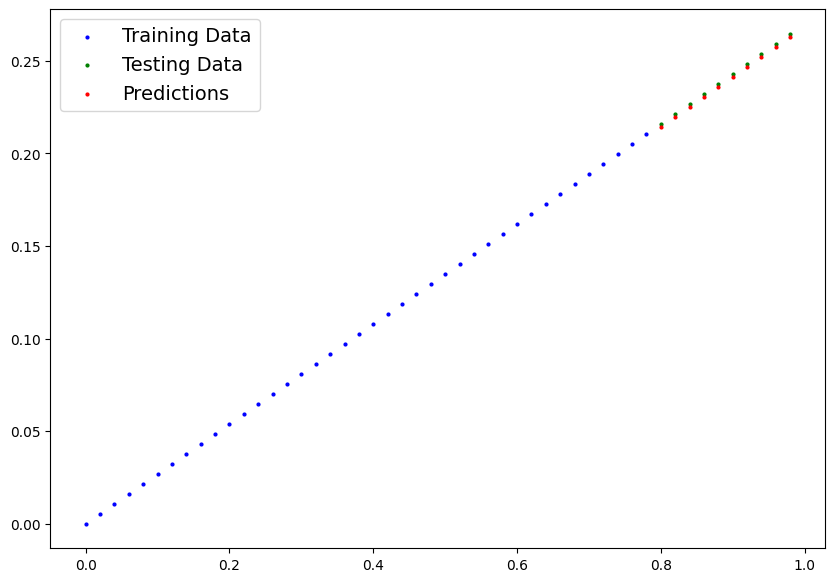

In [ ]:
# put the predictions back on the cpu to plot them

plot_predictions(predictions=y_preds.cpu())

In [ ]:
# Saving and loading a model
from pathlib import Path

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = '01.pytorch_model_0_Ex_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)
print(f"model_0, saved to {MODEL_SAVE_PATH}")

model_0, saved to models/01.pytorch_model_0_Ex_1.pth


In [ ]:
# Instantiate fresh instance of the LinearRegressionModel
loaded_model_1 = LinearRegressionModel() 

#load the saved state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#put model on target device
loaded_model_1.to(device)

print(f"Loaded model: \n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model: 
LinearRegressionModel()
Model on device:
cuda:0


In [ ]:
# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')